f(x) = -12x^4*sin(cos(x)) - 18x^3+5x^2 + 10x - 30

Определить корни

Найти интервалы, на которых функция возрастает

Найти интервалы, на которых функция убывает

Построить график

Вычислить вершину

Определить промежутки, на котором f > 0

Определить промежутки, на котором f < 0

In [1]:
from sympy import symbols, sin, cos
from sympy.plotting import plot
from scipy.optimize import fsolve
import matplotlib.pyplot as plt
import numpy

**График функции при помощи библиотеки matplotlib:**

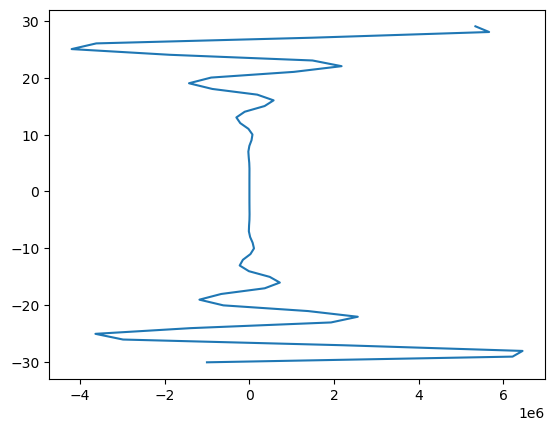

In [2]:
x = [(-12*x**4*sin(cos(x)) - 18*x**3+5*x**2 + 10*x - 30) for x in range (-30, 30)]
y = [y for y in range (-30, 30)]
plt.plot(x, y)
plt.show()

**График функции при помощи библиотеки sympy:**

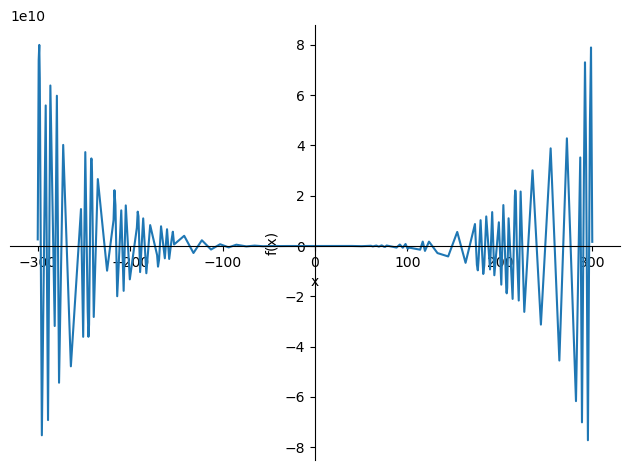

In [3]:
x = symbols('x')
plot(-12 * x**4 * sin(cos(x)) - 18 * x**3 + 5 * x**2 + 10 * x - 30, (x, -300, 300))

_И масштаб поближе:_

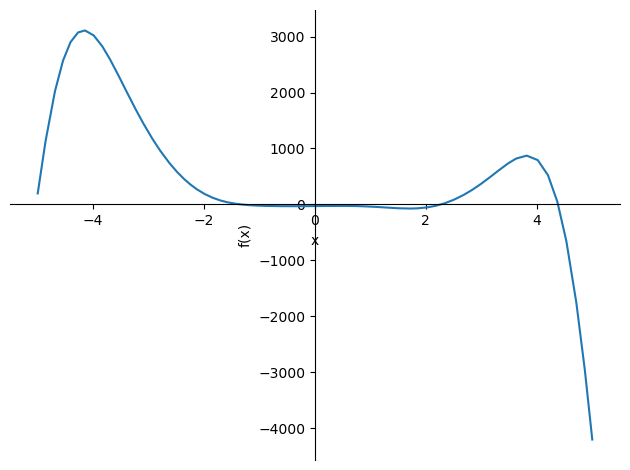

In [4]:
x = symbols('x')
plot(-12 * x**4 * sin(cos(x)) - 18 * x**3 + 5 * x**2 + 10 * x - 30, (x, -5, 5))

**Определить корни**

In [5]:
def f(x):
  return -12*x**4*numpy.sin(numpy.cos(x))-18*x**3+5*x**2+10*x-30

_Это тригонометрическая функция, имеющая бесконечное количество корней. Можно определить корни только на заданном интервале. Запросим их у пользователя:_

In [6]:
funcrange = list(map(int, input('Задайте интервал функции через пробел: ').split()))
leftnum = min(funcrange)
rightnum = max(funcrange)

Задайте интервал функции через пробел: -5 5


In [7]:
def solution():
  global leftnum, rightnum
  temp = leftnum
  rightnum = rightnum
  roots = []
  interval = []

  while temp < rightnum:
      if f(temp) >= 0 and f(temp + 1) <= 0:
          w = fsolve(f, temp)
          roots.append(*w)
      if f(temp) <= 0 and f(temp + 1) >= 0:
          w = fsolve(f, temp)
          roots.append(*w)
      if f(temp) > f(temp + 1) < f(temp + 2):
          interval.append(temp + 1)
      temp += 1
  roots = [round(i,2) for i in roots]
  print(f'Корни уравнения для заданного интервала: {roots}')
  return roots

**Определить промежутки, на которых f>0 и f<0:**

In [8]:
def func_interval(left, right):
    array = []
    temp = left
    while left < right:
        array.append([f(left), left])
        left += 0.1
    if array[0][0] > 0:
        print(f'f > 0 в промежутке {temp, right}')
        return max(array)
    else:
        print(f'f < 0 в промежутке {temp, right}')
        return min(array)

**Вычисляем координаты вершины функции на заданном интервале:**

In [9]:
def maxima_and_minima():
  roots = solution()

  if len(roots) < 2:
      print('На заданном интервале нет вершин')
  else:
      top = []
      for i in range(len(roots) - 1):
        top.append(func_interval(roots[i], roots[i + 1]))
      for j in top:
        j = [round(i,2) for i in j]
        print(f'Координаты вершин функции: [{j[1]}, {j[0]}]')
      if len(top) < 2:
          print('error')
      else:
          for i in range(len(top) - 1):
              if top[i][0] > top[i + 1][0]:
                  print('Функция убывает')
              else:
                  print('Функция возрастает')
maxima_and_minima()

Корни уравнения для заданного интервала: [-1.34, 2.27, 4.38]
f > 0 в промежутке (-1.34, 2.27)
f < 0 в промежутке (2.27, 4.38)
Координаты вершин функции: [-1.34, 0.11]
Координаты вершин функции: [2.27, -0.88]
Функция убывает
